# Lab 3: Conjugate Gradient / Newton's Method

In this lab we will look at modifying a steepest descent code to carry out conjugate gradient, and using Newton's method to solve a nonlinear problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
Below is a copy of the code we used to solve a quadratic minimisation problem using steepest descent.  Modify the code so that it computes the solution using conjugate gradient.  As an example, consider the problem of minimising $f(\boldsymbol x) = \frac{1}{2} \boldsymbol x^2 \mathbf Q \boldsymbol x - \boldsymbol x^T\boldsymbol b$, where

$$
\mathbf Q = \begin{bmatrix} 6 & 1 & 2 \\ 1 & 4 & 2 \\ 2 & 2 & 8 \end{bmatrix}, \qquad \boldsymbol b = \begin{bmatrix} 5 \\ 1 \\ 0 \end{bmatrix}.
$$

Recall that in conjugate gradient, we do not always step in the direction of the negative gradient; instead, we compute the direction vectors
$$
\boldsymbol d^{(0)} = -\boldsymbol g^{(0)}, \qquad \boldsymbol d^{(k+1)} = -\boldsymbol g^{(k+1)} + \beta_k \boldsymbol d^{(k)}, \qquad \beta_k = \frac{\boldsymbol g^{(k+1)T}\mathbf Q\boldsymbol d^{(k)T}}{\boldsymbol d^{(k)T}\mathbf Q\boldsymbol d^{(k)T}}
$$
and step size
$$
\alpha_k = -\frac{\boldsymbol g^{(k)T} \boldsymbol d^{(k)}}{\boldsymbol d^{(k)T}\mathbf Q\boldsymbol d^{(k)T}}.
$$

In [2]:
Q = np.array([[6., 1, 2],[1,4,2],[2,2,8]])
b = np.array([5.,1,0])
print(Q)
print(b)

[[6. 1. 2.]
 [1. 4. 2.]
 [2. 2. 8.]]
[5. 1. 0.]


In [3]:
np.linalg.solve(Q,b)

array([ 0.89473684,  0.15789474, -0.26315789])

x = [ 0.89473633  0.15787727 -0.26315498] , iterations = 14, norm(g) = 6.740862287388354e-05


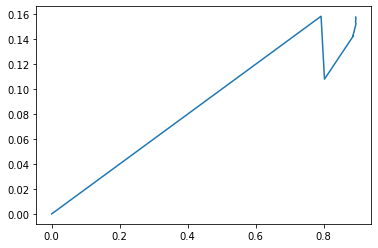

In [4]:
#THIS CURRENTLY DOES STEEPEST DESCENT

N = 100 #maximum no. of iterations
epsilon = 1.e-4 #tolerance

#Initial value
x = np.zeros(3) # initial guess
n = 0 #iteration count
g  = np.dot(Q,x) - b
gNorm = np.linalg.norm(g)

#Create arrays to store result at each iteration
xs = np.zeros([len(x),N+1]) #array for storing x values
xs[:,0] = x #initial value

while n < N and gNorm > epsilon:
     
    #make step
    alpha = np.dot(g,g)/np.dot(g,np.dot(Q,g))
    x = np.array(x - alpha*g)

    #compute gradient
    g = np.dot(Q,x) - b
    gNorm = np.linalg.norm(g)
    
    #add one to iteration counter
    n = n+1
        
    #Store computed value of x in matrix    
    xs[:,n] = x

#truncate unused elements in x array
xs = xs[:,:n+1]

print('x = ' + str(x), ', iterations = ' + str(n) + ', norm(g) = ' + str(gNorm))
plt.plot(xs[0,],xs[1,])
plt.show()

In [5]:
#THIS DOES CONJUGATE GRADIENT

N = 100 #maximum no. of iterations
epsilon = 1.e-4 #tolerance

#Initial value
x = np.zeros(3) # initial guess
n = 0 #iteration count
g  = np.dot(Q,x) - b
gNorm = np.linalg.norm(g)
d=-g

#Create arrays to store result at each iteration
xt = np.zeros([len(x),N+1]) #array for storing x values
xt[:,0] = x #initial value

while n < N and gNorm > epsilon:
     
    #make step
    alpha =-np.dot(g.transpose(),d)/np.dot(d.transpose(),np.dot(Q,d))
    x = np.array(x + alpha*d)
    
    #compute gradient
    g = np.dot(Q,x) - b
    gNorm = np.linalg.norm(g)
    beta=np.dot(g.transpose(),np.dot(Q,d))/np.dot(d.transpose(),np.dot(Q,d))
    d=-g+beta*d
    
    #add one to iteration counter
    n = n+1
        
    #Store computed value of x in matrix    
    xt[:,n] = x

#truncate unused elements in x array
xt = xt[:,:n+1]

print('x = ' + str(x), ', iterations = ' + str(n) + ', norm(g) = ' + str(gNorm))


x = [ 0.89473684  0.15789474 -0.26315789] , iterations = 3, norm(g) = 4.965068306494546e-16


Check that the solution has converged to the exact answer in the appropriate number of iterations.

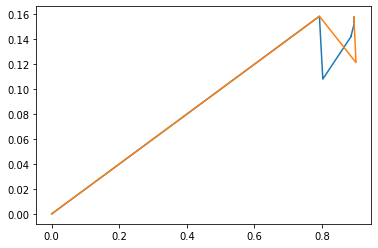

In [6]:
plt.plot(xs[0,],xs[1,])
plt.plot(xt[0,],xt[1,])
plt.show()

We will now look at Newton's method, which is relevant for non-quadratic optimisation problems (that is, solving nonlinear systems).

## Exercise 2

Consider the optimisation problem:

Minimise 
$$ f(x_1,x_2) = \frac{1}{2}\sin(2x_1) + x_1x_2 + \mathrm e^{x_2^2}.
$$

(a) Define function gfun and Ffun that evaluate the gradient and Hessian at a given $x$ (use pen and paper to work out these functions).

(b) Copy and modify the conjugate gradient code above to perform Newton's method.  Run the algorithm from a starting point $(x_1^{(0)}, x_2^{(0)}) = (0,0)$.  Can you find different solutions from different starting points?

Note that every step of Newton's method requires us to solve a linear system.  We will use `np.linalg.solve` in this case.  In the "real world", a method such as conjugate gradient could be used to iteratively solve this linear problem at each step of Newton's method!

In [7]:
def gFun(x1,x2):
    g1=np.cos(2*x1)+x2
    g2=x1+2*x2*np.exp(x2**2)
    g=np.array([[g1,g2]])
    return np.transpose(g)

gFun(0,0)

array([[1.],
       [0.]])

In [8]:
def Ffun(x1,x2):
    a=-2*(np.sin(2*x1))
    b=1
    c=1
    d=(2+4*x2**2)*(np.exp(x2**2))
    F=[[a,b],[c,d]]
    return F
    
Ffun(0,0)

[[-0.0, 1], [1, 2.0]]

In [10]:
#THIS DOES NEWTON METHOD

N = 100 #maximum no. of iterations
epsilon = 1.e-4 #tolerance

#Initial value
x1=0 #initial guess
x2=0 # initial guess
X=[[x1],[x2]]
n = 0 #iteration count
g  = gFun(x1,x2)
gNorm = np.linalg.norm(g)
H=np.linalg.inv(Ffun(x1,x2))


#Create arrays to store result at each iteration
xc = np.zeros([len(X),N+1]) #array for storing x values
xc[:,0] = (x1,x2) #initial value

while n < N and gNorm > epsilon:
     
    #make step
    X=X-H@g
    x1=X[0,0]
    x2=X[1,0]
    g=gFun(x1,x2)
    H=np.linalg.inv(Ffun(x1,x2))
    gNorm=np.linalg.norm(g)
    
    
    #add one to iteration counter
    n = n+1
        
    #Store computed value of x in matrix    
    xc[:,n] = (x1,x2)

#truncate unused elements in x array
xc = xc[:,:n+1]

print('x = ' + str((x1,x2)), ', iterations = ' + str(n) + ', norm(g) = ' + str(gNorm))


x = (2.796648470743087, -0.7713171652118586) , iterations = 6, norm(g) = 9.600839374001427e-08
